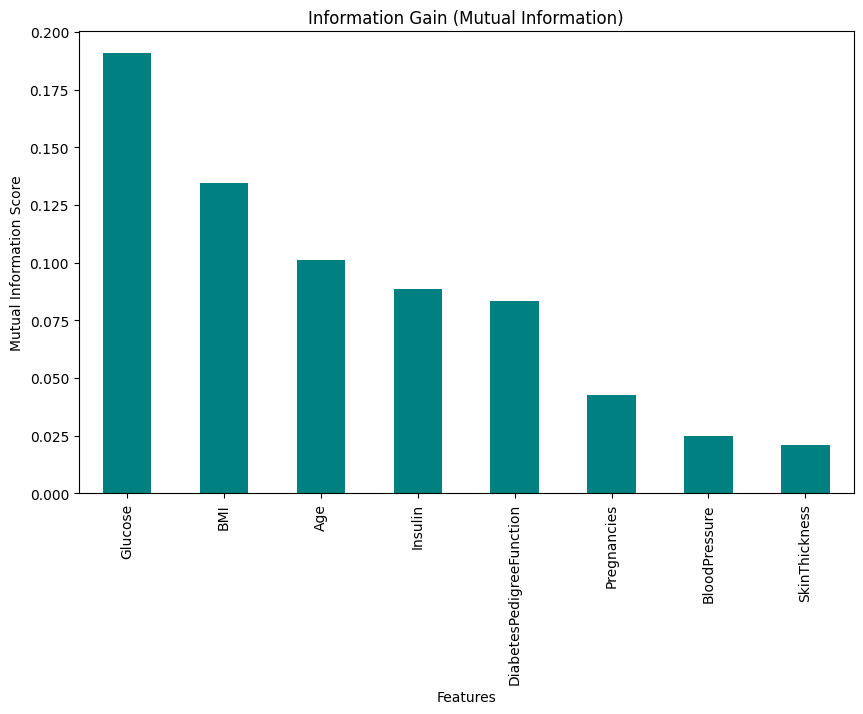

In [ ]:
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)

# plot information gain
plt.figure(figsize=(10, 6))
mi_scores.plot(kind="bar", color="teal")
plt.title("Information Gain (Mutual Information)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

###
#  Chi-square scores

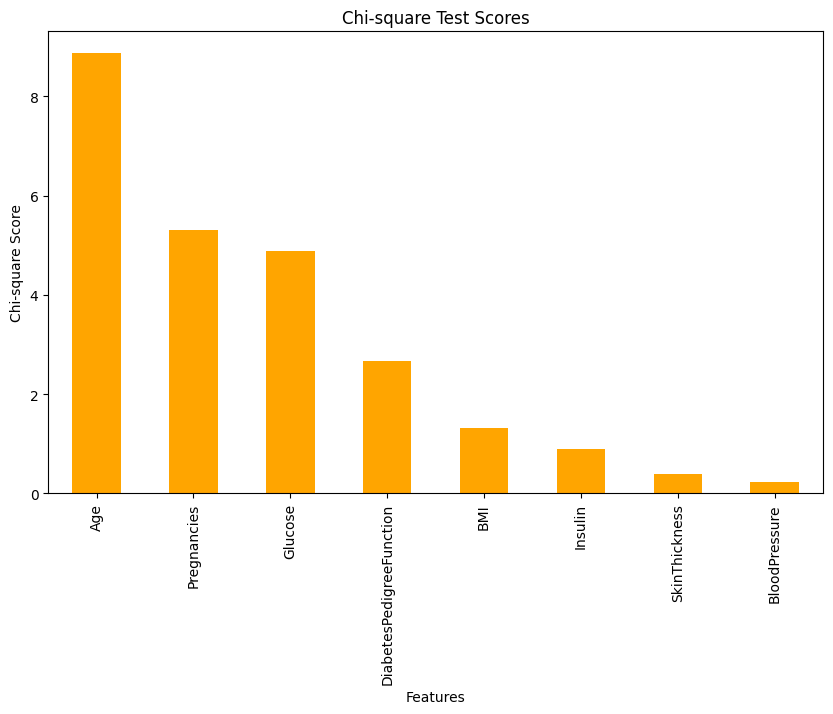

In [ ]:
minmax_scaler = MinMaxScaler()
X_non_negative = minmax_scaler.fit_transform(X)

y_bin = np.where(y > np.median(y), 1, 0)  # convert to binary classification

chi2_scores, _ = chi2(X_non_negative, y_bin)
chi2_scores = pd.Series(chi2_scores, index=X.columns)
chi2_scores.sort_values(ascending=False, inplace=True)

# plot Chi-square Scores
plt.figure(figsize=(10, 6))
chi2_scores.plot(kind="bar", color="orange")
plt.title("Chi-square Test Scores")
plt.xlabel("Features")
plt.ylabel("Chi-square Score")
plt.show()


#  Fisher Score

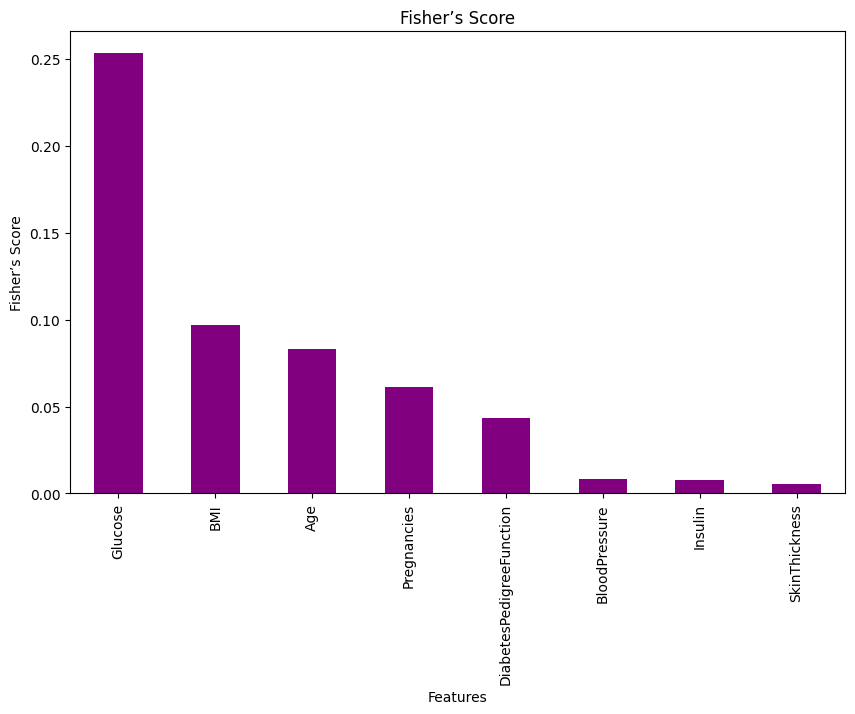

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# use original y if already binary, otherwise binarize
if len(np.unique(y)) == 2:
    y_bin = y
else:
    y_bin = np.where(y > np.median(y), 1, 0)

def fisher_score(X, y):
    classes = np.unique(y)
    overall_mean = np.mean(X, axis=0)
    between_var = np.zeros(X.shape[1])
    within_var = np.zeros(X.shape[1])

    for c in classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        between_var += n_c * (mean_c - overall_mean) ** 2
        within_var += np.sum((X_c - mean_c) ** 2, axis=0)

    fisher_scores = between_var / within_var
    return fisher_scores

fisher_scores = fisher_score(X_scaled, y_bin)
fisher_scores = pd.Series(fisher_scores, index=X.columns)
fisher_scores.sort_values(ascending=False, inplace=True)

# plot Fisher’s Scores
plt.figure(figsize=(10, 6))
fisher_scores.plot(kind="bar", color="purple")
plt.title("Fisher’s Score")
plt.xlabel("Features")
plt.ylabel("Fisher’s Score")
plt.show()


# correlation Coefficient

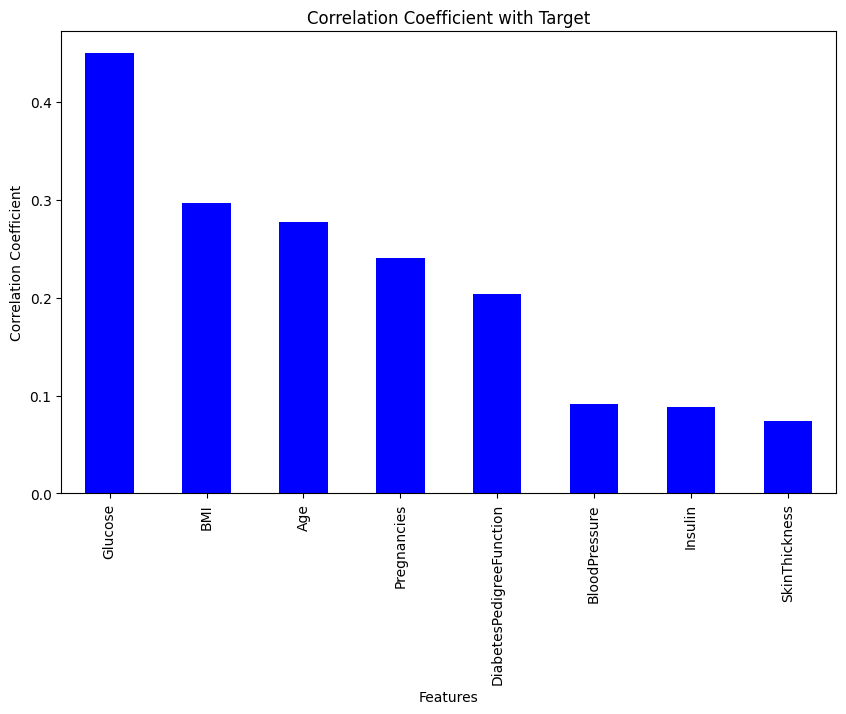

In [ ]:
corr_scores = np.corrcoef(X.T, y)[-1, :-1]  # Correlation with target
corr_scores = pd.Series(corr_scores, index= X.columns)
corr_scores.sort_values(ascending=False, inplace=True)

# plot Correlation Coefficients
plt.figure(figsize=(10, 6))
corr_scores.plot(kind="bar", color="blue")
plt.title("Correlation Coefficient with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

In [ ]:
# variance Threshold
variance_threshold = VarianceThreshold(threshold=0.1)  # remove low-variance features
X_variance_selected = variance_threshold.fit_transform(X)

# selected features
selected_features = variance_threshold.get_support(indices=True)
print("Selected Features (Variance Threshold):", [X.columns[i] for i in selected_features])

Selected Features (Variance Threshold): ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


# ANOVA (F-test)

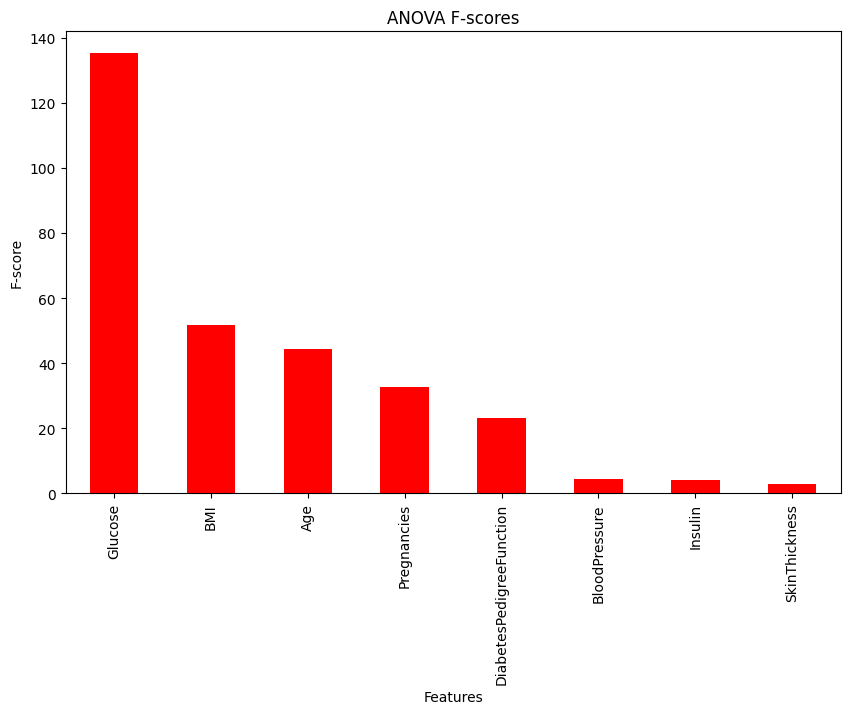

In [ ]:

f_scores, _ = f_classif(X, y)  # ANOVA F-test
f_scores = pd.Series(f_scores, index=X.columns)
f_scores.sort_values(ascending=False, inplace=True)

# plot ANOVA F-scores
plt.figure(figsize=(10, 6))
f_scores.plot(kind="bar", color="red")
plt.title("ANOVA F-scores")
plt.xlabel("Features")
plt.ylabel("F-score")
plt.show()

#relief

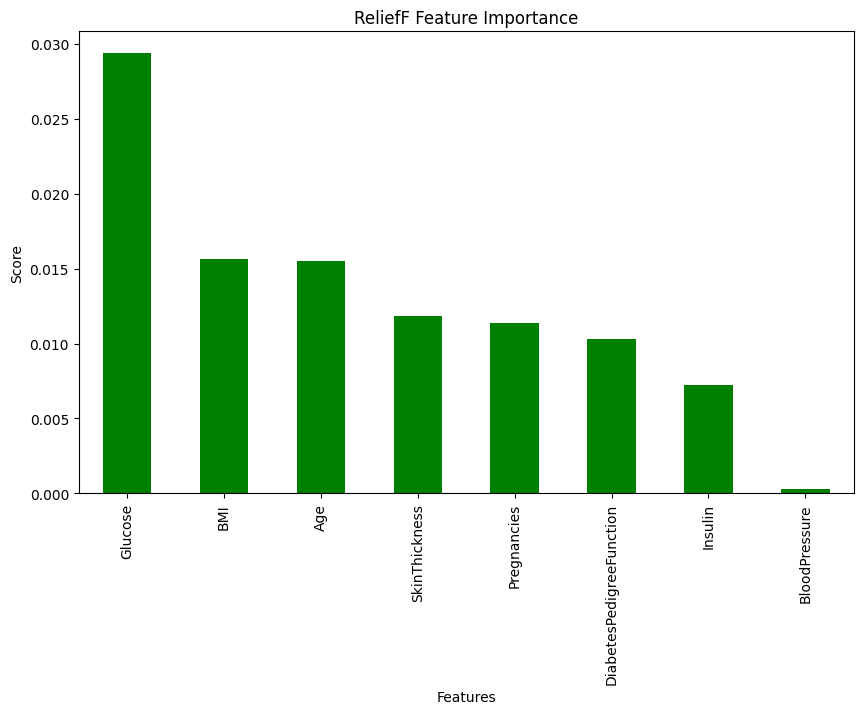

In [ ]:
relief = ReliefF(n_neighbors=20)
relief.fit(X.values, y.values)

scores = pd.Series(relief.feature_importances_, index=X.columns)
scores.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
scores.plot(kind='bar', color='green')
plt.title('ReliefF Feature Importance')
plt.ylabel('Score')
plt.xlabel('Features')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#exhaustive Feature selection

In [ ]:

efs = EFS(
    estimator=RandomForestClassifier(
    n_estimators=3,
    random_state=0),
    min_features=1,
    max_features=7,
    scoring='roc_auc',
    cv=2,
)
efs = efs.fit(X_train, y_train)
efs.best_feature_names_

Features: 254/254

('Pregnancies',
 'Glucose',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age')

#Forward selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
FS = SFS(
    estimator=RandomForestClassifier(n_estimators=5, random_state=0),
    n_features_to_select=7,
    tol=0.001,
    direction='forward',
    scoring='roc_auc',
    cv=3,
)
FS = FS.fit(X_train, y_train)
FS.get_feature_names_out()



array(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'], dtype=object)

#Backward Selection

In [ ]:

BS = SFS(
    estimator = RandomForestClassifier(n_estimators=5, random_state=10),
    n_features_to_select=7,
    tol=0.001,
    direction='backward',
    scoring='r2',
    cv=3,
)
BS = BS.fit(X_train, y_train)
BS.get_feature_names_out()

array(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'], dtype=object)

#RFE

In [ ]:

from sklearn.feature_selection import RFE

selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


#voting betwen all algorithms

In [ ]:
votes = {}

for feature, score in mi_scores.items():
    votes[feature] = votes.get(feature, 0) + 1 if score > 0 else votes.get(feature, 0)

for feature, score in chi2_scores.items():
    votes[feature] = votes.get(feature, 0) + 1 if score > 0 else votes.get(feature, 0)

for feature, score in fisher_scores.items():
    votes[feature] = votes.get(feature, 0) + 1 if score > 0 else votes.get(feature, 0)

for feature, score in f_scores.items():
    votes[feature] = votes.get(feature, 0) + 1 if score > 0 else votes.get(feature, 0)

for feature, score in scores.items():
    votes[feature] = votes.get(feature, 0) + 1 if score > 0 else votes.get(feature, 0)

for feature in efs.best_feature_names_:
    votes[feature] = votes.get(feature, 0) + 1

for feature in FS.get_feature_names_out():
    votes[feature] = votes.get(feature, 0) + 1

for feature in BS.get_feature_names_out():
    votes[feature] = votes.get(feature, 0) + 1

for feature in selected_features:
    votes[feature] = votes.get(feature, 0) + 1

sorted_votes = sorted(votes.items(), key=lambda x: x[1], reverse=True)

top_7_features = [feature for feature, _ in sorted_votes[:7]]

print("Top 7 Selected Features:", top_7_features)


Top 7 Selected Features: ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Pregnancies', 'Insulin', 'BloodPressure']


**After performing feature selection and applying a voting mechanism across different algorithms, we identified the top 7 features out of 9 as the most important. However, we observed that the remaining 2 features are not significantly less important than the top 7. In fact, they also hold valuable information. Considering that the total number of features is already small (only 9), and each feature contributes meaningfully to the results, we decided to include all 9 features when applying the models.**